In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d

import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from scipy.stats.mstats import winsorize


pd.set_option("display.max_columns", None)
pd.set_option('future.no_silent_downcasting', True)

from utils.categorical_qcut import categorical_qcut

from tqdm import tqdm
tqdm.pandas()

# DATA WRANGLING

## EURO

In [2]:
import_folder_path = rf"../europe"
df00 = pd.read_pickle(rf"{import_folder_path}/Europe_dataset_scoredOnly.pkl")

In [3]:
df00

,responseid,country_text,country,age,gender_text,age_rec,isced,income,wealth,Certainty_5,Uncertainty_2,RiskComprehension_5,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,Certainty_%,Uncertainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_19,TotalScore_%,prevelanceestimate1,prevelanceestimate2,prevelanceestimate3,financialplanning_euro_spending,financialplanning_euro_emergency,certainty1,certainty2,certainty3,certainty4,certainty5,uncertainty1,uncertainty2,numeracy1,numeracy2,numeracy3,graph1,graph2,graph3,riskcomprehension1,riskcomprehension2,riskcomprehension3,riskcomprehension4,riskcomprehension5,bayesian1
0,1,UK,9.0,36.0,Female,3,1,3.0,20000.0,5,2,3,3,3,1,100.0,100.0,60.0,100.000000,100.000000,100.0,17,89.473684,0,1,0,2.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1
1,2,France,12.0,69.0,Male,4,1,3.0,300000.0,1,1,4,2,3,1,20.0,50.0,80.0,66.666667,100.000000,100.0,12,63.157895,0,1,0,2.0,1.0,0,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1
2,5,Spain,10.0,49.0,Female,3,1,1.0,100000.0,4,1,2,1,1,0,80.0,50.0,40.0,33.333333,33.333333,0.0,9,47.368421,0,1,1,2.0,4.0,1,1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0
3,8,France,12.0,30.0,Female,2,1,3.0,-1.0,1,1,3,3,2,0,20.0,50.0,60.0,100.000000,66.666667,0.0,10,52.631579,0,1,0,1.0,3.0,0,0,0,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0
4,9,Spain,10.0,37.0,Male,3,1,2.0,10000.0,3,1,5,3,3,0,60.0,50.0,100.0,100.000000,100.000000,0.0,15,78.947368,0,1,0,2.0,4.0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,15636,Spain,10.0,61.0,Female,4,3,2.0,-1.0,1,0,2,0,1,0,20.0,0.0,40.0,0.000000,33.333333,0.0,4,21.052632,1,0,0,3.0,4.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3902,15717,UK,9.0,26.0,Female,2,2,1.0,-1.0,2,1,3,3,3,0,40.0,50.0,60.0,100.000000,100.000000,0.0,12,63.157895,0,0,0,2.0,4.0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0
3903,15788,Germany,7.0,21.0,Male,2,1,4.0,-1.0,2,1,4,2,0,0,40.0,50.0,80.0,66.666667,0.000000,0.0,9,47.368421,0,1,1,2.0,3.0,0,0,0,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,0
3904,15843,France,12.0,18.0,Female,2,2,1.0,-1.0,1,1,3,3,2,0,20.0,50.0,60.0,100.000000,66.666667,0.0,10,52.631579,0,0,0,1.0,2.0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,0,0


In [4]:
def remove_indexname(series): # removes index name
    series.index.name = None
    series.name = None
    return series.to_string()

# print("Total Observations:", df00["Q1"].count())

print(f'\nGender:\n{remove_indexname(df00["gender_text"].value_counts())}')
print('-' * 100)
print(f'ISCED:\n{remove_indexname(df00["isced"].value_counts().sort_index())}')
print('-' * 100)
# print(f'Income:\n{remove_indexname(df00["income_text"].value_counts().sort_index())}')
print(f'\nIncome_code:\n{remove_indexname(df00["income"].value_counts().sort_index())}')
print('-' * 100)
print(f'Countries:\n{remove_indexname(df00["country_text"].value_counts())}')
print(f'\nCountries_code:\n{remove_indexname(df00["country"].value_counts())}')
print('-' * 100)



# print(f'\nOccupation:\n{remove_indexname(df0["Q4a"].value_counts())}')
# print(f'\nEducation:\n{remove_indexname(df0["Q3"].value_counts())}')


Gender:
Female    2000
Male      1906
----------------------------------------------------------------------------------------------------
ISCED:
1    1197
2    1795
3     914
----------------------------------------------------------------------------------------------------

Income_code:
-1.0    535
 1.0    853
 2.0    785
 3.0    654
 4.0    480
 5.0    359
 6.0    240
----------------------------------------------------------------------------------------------------
Countries:
France     677
Poland     656
UK         652
Spain      646
Sweden     643
Germany    632

Countries_code:
12.0    677
21.0    656
9.0     652
10.0    646
29.0    643
7.0     632
----------------------------------------------------------------------------------------------------


In [5]:
euro0 = df00.copy()

---

# India - Dynata

In [6]:
import_folder_path = rf"../india_dynata"

df00 = pd.read_pickle(rf"{import_folder_path}/India_Dynata_dataset_scoredOnly.pkl")

In [7]:
def remove_indexname(series): # removes index name
    series.index.name = None
    series.name = None
    return series.to_string()

print("Total Observations:", df00["gender_text"].count())

print(f'\nGender:\n{remove_indexname(df00["gender_text"].value_counts())}')
# print(f'\nOccupation:\n{remove_indexname(df00["Q4a"].value_counts())}')
# print(f'\nEducation:\n{remove_indexname(df00["Q3"].value_counts())}')
print(f'\nISCED:\n{remove_indexname(df00["isced"].value_counts())}')
print(f'\nIncome:\n{remove_indexname(df00["income"].value_counts().iloc[[1, 0, 2, 3, 4, 5]])}')

Total Observations: 699

Gender:
Male      361
Female    338

ISCED:
1    252
2    241
3    206

Income:
1    194
2    221
3    114
4     76
5     52
6     42


In [8]:
dyn0 = df00.copy()
dyn0

,responseid,country_text,country,age,gender_text,age_rec,isced,income,wealth,Certainty_5,Uncertainty_2,RiskComprehension_5,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,Certainty_%,Uncertainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_19,TotalScore_%,RiskAssets_%,SafeAssets_%,RiskAlignment,RiskAlignment_residual,RiskAlignment_felix,RiskAppetite1_%,RiskAppetite_7,RiskAppetite2_%,InvestmentXP_4,FinancialPlanning1_6,FinancialPlanning2_6,FinancialPlanning1_%,FinancialPlanning2_%,FinancialLiteracy_%,FinancialLiteracy_3,CRTScore_3,CRTScore_%,certainty1,certainty2,certainty3,certainty4,certainty5,uncertainty1,uncertainty2,numeracy1,numeracy2,numeracy3,graph1,graph2,graph3,riskcomprehension1,riskcomprehension2,riskcomprehension3,riskcomprehension4,riskcomprehension5,bayesian1,financialplanning_1,financialplanning_2,financialplanning_3,financialplanning_4,financialplanning_5,financialplanning_6,financialplanning_emergency,financialplanning_retirement,savings_bank,fixed_deposits,recurring_deposits,gov_bonds,corp_bonds,mutual_funds,stocks,real_estate,commodities,other_invest,savings_bank_dummy,gov_bonds_dummy,mutual_funds_dummy,stocks_dummy,investment_behaviour,risky_investments,investments
0,0,India,0,30.0,Male,2,1,2,5000000.0,2.0,0.0,1.0,2.0,1.0,1.0,40.0,0.0,20.0,66.666667,33.333333,100.0,7.0,36.842105,50.0,50.0,71.428571,-21.428571,3.50,71.428571,5.0,75.0,3.0,5.500000,5.500,91.666667,91.666667,66.666667,2.0,1.0,33.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5,5,5,6,6,6,5,6,25.0,15.0,10.0,0.0,0.0,15.0,15.0,15.0,5.0,0.0,1,0,1,1,3,50.0,50.0
1,1,India,0,53.0,Male,3,1,4,9000000.0,4.0,0.0,2.0,1.0,0.0,1.0,80.0,0.0,40.0,33.333333,0.000000,100.0,8.0,42.105263,80.0,20.0,71.428571,8.571429,5.60,71.428571,5.0,50.0,2.0,3.833333,4.125,63.888889,68.750000,100.000000,3.0,1.0,33.333333,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4,2,2,5,5,5,4,6,10.0,10.0,0.0,0.0,0.0,10.0,0.0,40.0,20.0,10.0,1,0,1,0,2,80.0,80.0
2,2,India,0,43.0,Male,3,2,1,2200000.0,4.0,1.0,3.0,3.0,2.0,0.0,80.0,50.0,60.0,100.000000,66.666667,0.0,13.0,68.421053,0.0,100.0,85.714286,-85.714286,0.00,85.714286,6.0,50.0,2.0,4.666667,4.625,77.777778,77.083333,66.666667,2.0,0.0,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,5,4,5,4,5,5,5,4,80.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0.0,0.0
3,3,India,0,32.0,Male,2,2,3,8000000.0,4.0,0.0,1.0,1.0,3.0,0.0,80.0,0.0,20.0,33.333333,100.000000,0.0,9.0,47.368421,75.0,25.0,100.000000,-25.000000,5.25,100.000000,7.0,100.0,4.0,5.500000,5.625,91.666667,93.750000,100.000000,3.0,0.0,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,5,5,6,6,5,6,6,10.0,5.0,5.0,5.0,0.0,40.0,5.0,0.0,20.0,10.0,1,1,1,1,4,75.0,80.0
4,4,India,0,31.0,Female,2,1,3,35000000.0,3.0,1.0,2.0,1.0,1.0,0.0,60.0,50.0,40.0,33.333333,33.333333,0.0,8.0,42.105263,34.0,66.0,85.714286,-51.714286,2.38,85.714286,6.0,100.0,4.0,5.000000,5.000,83.333333,83.333333,33.333333,1.0,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,5,4,5,6,6,5,5,20.0,25.0,5.0,10.0,6.0,5.0,5.0,15.0,9.0,0.0,1,1,1,1,4,34.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,694,India,0,44.0,Female,3,1,2,5000000.0,4.0,2.0,4.0,2.0,2.0,0.0,80.0,100.0,80.0,66.666667,66.666667,0.0,14.0,73.684211,75.0,25.0,42.857143,32.142857,5.25,42.857143,3.0,50.0,2.0,3.833333,4.125,63.888889,68.750000,100.000000,3.0,1.0,33.333333,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,5,5,3,2,3,5,5,5,10.0,10.0,5.0,0.0,0.0,50.0,5.0,0.0,18.0,2.0,1,0,1,1,3,75.0,75.0
695,695,India,0,37.0,Male,3,1,2,3000000.0,4.0,1.0

### WEALTH WINSORIZATION - [0.01, 0.01]

       winsorised_wealth  nonwinsorised_wealth
count       6.990000e+02          6.990000e+02
mean        7.060813e+06          1.628566e+08
std         2.068795e+07          3.794346e+09
min         0.000000e+00          0.000000e+00
25%         1.000000e+05          1.000000e+05
50%         6.000000e+05          6.000000e+05
75%         4.000000e+06          4.000000e+06
max         1.500000e+08          1.000000e+11


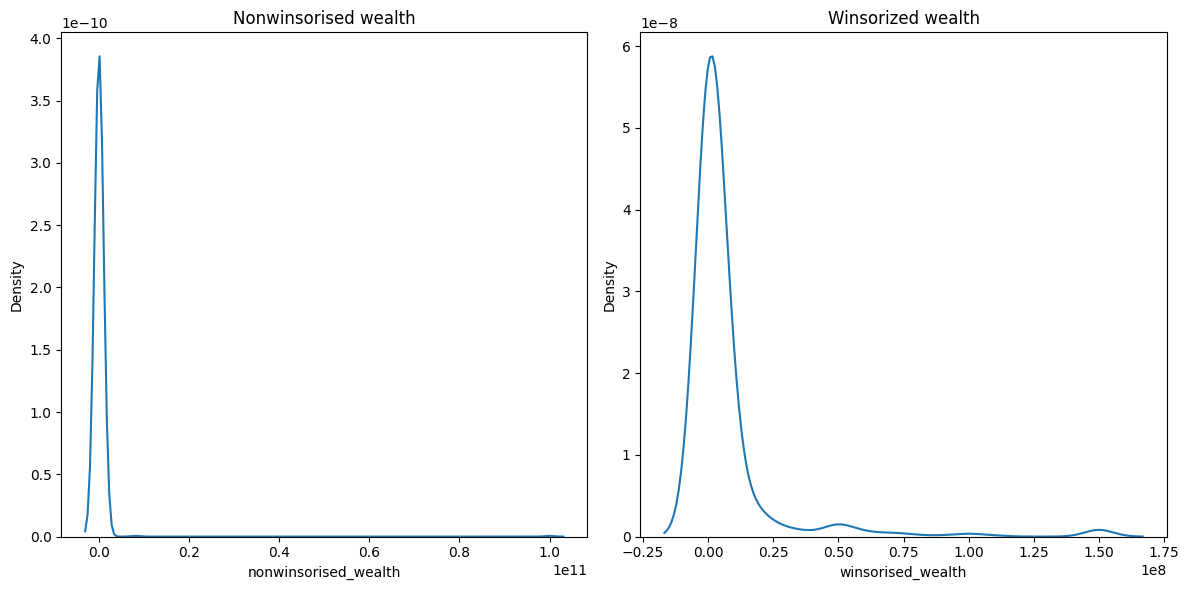

In [9]:
## Winsorizing Wealth
from utils.winsorize import winsorize_output
winsorized_wealth = winsorize_output(dyn0, "wealth", [0.01, 0.01])
# Using winsorised wealth as wealth
dyn0["wealth"] = winsorized_wealth

---

---

In [10]:
main = pd.concat([dyn0, euro0]).reset_index(drop = True)
main["score_combined_%"] = ((main["GraphLiteracy_3"] + main["Numeracy_3"]) / 6) * 100
main["region"] = np.where(main["country"] == 0.0, "India", "Europe")
main

,responseid,country_text,country,age,gender_text,age_rec,isced,income,wealth,Certainty_5,Uncertainty_2,RiskComprehension_5,GraphLiteracy_3,Numeracy_3,Bayesianreasoning_1,Certainty_%,Uncertainty_%,RiskComprehension_%,GraphLiteracy_%,Numeracy_%,Bayesianreasoning_%,TotalScore_19,TotalScore_%,RiskAssets_%,SafeAssets_%,RiskAlignment,RiskAlignment_residual,RiskAlignment_felix,RiskAppetite1_%,RiskAppetite_7,RiskAppetite2_%,InvestmentXP_4,FinancialPlanning1_6,FinancialPlanning2_6,FinancialPlanning1_%,FinancialPlanning2_%,FinancialLiteracy_%,FinancialLiteracy_3,CRTScore_3,CRTScore_%,certainty1,certainty2,certainty3,certainty4,certainty5,uncertainty1,uncertainty2,numeracy1,numeracy2,numeracy3,graph1,graph2,graph3,riskcomprehension1,riskcomprehension2,riskcomprehension3,riskcomprehension4,riskcomprehension5,bayesian1,financialplanning_1,financialplanning_2,financialplanning_3,financialplanning_4,financialplanning_5,financialplanning_6,financialplanning_emergency,financialplanning_retirement,savings_bank,fixed_deposits,recurring_deposits,gov_bonds,corp_bonds,mutual_funds,stocks,real_estate,commodities,other_invest,savings_bank_dummy,gov_bonds_dummy,mutual_funds_dummy,stocks_dummy,investment_behaviour,risky_investments,investments,prevelanceestimate1,prevelanceestimate2,prevelanceestimate3,financialplanning_euro_spending,financialplanning_euro_emergency,score_combined_%,region
0,0,India,0.0,30.0,Male,2,1,2.0,5000000.0,2.0,0.0,1.0,2.0,1.0,1.0,40.0,0.0,20.0,66.666667,33.333333,100.0,7.0,36.842105,50.0,50.0,71.428571,-21.428571,3.50,71.428571,5.0,75.0,3.0,5.500000,5.500,91.666667,91.666667,66.666667,2.0,1.0,33.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0,5.0,6.0,6.0,6.0,5.0,6.0,25.0,15.0,10.0,0.0,0.0,15.0,15.0,15.0,5.0,0.0,1.0,0.0,1.0,1.0,3.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,50.000000,India
1,1,India,0.0,53.0,Male,3,1,4.0,9000000.0,4.0,0.0,2.0,1.0,0.0,1.0,80.0,0.0,40.0,33.333333,0.000000,100.0,8.0,42.105263,80.0,20.0,71.428571,8.571429,5.60,71.428571,5.0,50.0,2.0,3.833333,4.125,63.888889,68.750000,100.000000,3.0,1.0,33.333333,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,5.0,5.0,4.0,6.0,10.0,10.0,0.0,0.0,0.0,10.0,0.0,40.0,20.0,10.0,1.0,0.0,1.0,0.0,2.0,80.0,80.0,NaN,NaN,NaN,NaN,NaN,16.666667,India
2,2,India,0.0,43.0,Male,3,2,1.0,2200000.0,4.0,1.0,3.0,3.0,2.0,0.0,80.0,50.0,60.0,100.000000,66.666667,0.0,13.0,68.421053,0.0,100.0,85.714286,-85.714286,0.00,85.714286,6.0,50.0,2.0,4.666667,4.625,77.777778,77.083333,66.666667,2.0,0.0,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,80.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,83.333333,India
3,3,India,0.0,32.0,Male,2,2,3.0,8000000.0,4.0,0.0,1.0,1.0,3.0,0.0,80.0,0.0,20.0,33.333333,100.000000,0.0,9.0,47.368421,75.0,25.0,100.000000,-25.000000,5.25,100.000000,7.0,100.0,4.0,5.500000,5.625,91.666667,93.750000,100.000000,3.0,0.0,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,5.0,6.0,6.0,5.0,6.0,6.0,10.0,5.0,5.0,5.0,0.0,40.0,5.0,0.0,20.0,10.0,1.0,1.0,1.0,1.0,4.0,75.0,80.0,NaN,NaN,NaN,NaN,NaN,66.666667,India
4,4,India,0.0,31.0,Female,2,1,3.0,35000000.0,3.0,1.0,2.0,1.0,1.0,0.0,60.0,50.0,40.0,33.333333,33.333333,0.0,8.0,42.105263,34.0,66.0,85.714286,-51.714286,2.38,85.714286,6.0,100.0,4.0,5.000000,5.000,83.333333,83.333333,33.333333,1.0,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,5.0,4.0,5.0,6.0,6.0,5.0,5.0,20.0,25.0,5.0,10.0,6.0,5.0,5.0,15.0,9.0,0.0,1.0,1.0,1.0,1.0,4.0,34.0,50.0,NaN,NaN,NaN,NaN,NaN,33.333333,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

---

---

## Helper Functions

In [11]:
def risklit_quartile(data: pd.DataFrame, filter_variable: str) -> pd.DataFrame:

    data["risklit_quartile"] = pd.qcut(data.loc[~ (data[filter_variable]==-1)]["TotalScore_%"],
                                       q = 4, labels = False, duplicates = "raise" ) + 1
    return data


In [12]:

def regression_output(data: pd.DataFrame, regression_type: str, dependent_variable: str, independent_variable: str,
                      control_variables: list, depvar_absval: bool = False) -> pd.DataFrame :
    
    country = data["country_text"].value_counts().index.values
    if len(country) == 1:
        country = country[0]
    else:
        country = "Europe"
    
    if depvar_absval == True:
        data[dependent_variable] = data[dependent_variable].abs().copy()

    if regression_type == "OLS":

        model = sm.OLS(data[dependent_variable],
                       sm.add_constant(data[[independent_variable] + control_variables]))
        res = model.fit()
    
    elif regression_type == "OrderedModel":

        data[dependent_variable] = pd.Categorical(data[dependent_variable], ordered=True)

        model = OrderedModel(data[dependent_variable],
                             data[[independent_variable] + control_variables], distr='logit')
        res = model.fit(method='bfgs')

    else:
        raise ValueError("Unsupported regression_type. Use 'OLS' or 'OrderedModel'.")
    
    def format_coefficient(coef, pval):
        if pval < 0.01:
            stars = "***"
        elif pval < 0.05:
            stars = "**"
        elif pval < 0.10:
            stars = "*"
        else:
            stars = ""
        return f"{coef:.3f}{stars}"
    
    def format_p_value(pval):
        return f'="({pval:.3f})"'
    
    # output = pd.DatFrame(index = ["risklit_quartile", "isced", "age_rec", "FinancialLiteracy_%", "CRTScore_%"])

    rows = []
    for var, coeff, pval in zip(res.params.index, res.params, res.pvalues):
        rows.append([var, str(format_coefficient(coeff, pval))])
        rows.append(["", str(format_p_value(pval))])
    
    output = pd.DataFrame(data = rows, columns = [", ".join([regression_type, country]), dependent_variable])
    return output


---

---

In [13]:
#Global Vras:
facet_cols = ["Certainty_5", "Uncertainty_2", "RiskComprehension_5", "GraphLiteracy_3",
              "Numeracy_3", "Bayesianreasoning_1"]

facet_percent_cols = ["Certainty_%", "Uncertainty_%", "RiskComprehension_%", "GraphLiteracy_%",
                      "Numeracy_%", "Bayesianreasoning_%",]

# in use - Numeracy, Certainy, Graph ONLY

---

---

# I. By Country

## Numeracy, Certainty, Graph and Combined Score

### Income Quartiles Ordered Model Regression

In [14]:
import csv
country_codes = main["country"].value_counts().index.values
filter_variable = "income"
independent_variables = ["Numeracy_%", "GraphLiteracy_%", "score_combined_%"]
csv_list = []

for independent_variable in independent_variables:
    country_list = []
    for country in country_codes:
        data = main.loc[(main["country"] == country) & (main[filter_variable] != -1)].copy()
        
        data["income_quartile"], assign_dict = categorical_qcut(data["income"], qcut = 4)
        data["income_quartile"] = data["income_quartile"] + 1
        
        data[f"{independent_variable[:-2]}_quartile"], assign_dict = categorical_qcut(data[independent_variable], qcut = 4)
        data[f"{independent_variable[:-2]}_quartile"] = data[f"{independent_variable[:-2]}_quartile"] + 1

        controls = ["isced", "age_rec"]

        if country == 0:
            india_additional_controls = ["FinancialLiteracy_3", "CRTScore_%"]
            controls = controls + india_additional_controls

        output = regression_output(data = data, regression_type = "OrderedModel",
                                dependent_variable = "income_quartile", independent_variable = f"{independent_variable[:-2]}_quartile",
                                control_variables = controls, depvar_absval = False)
        
        country_list.append(output)

    variable_output = pd.concat(country_list, axis = 1)
    variable_header = pd.DataFrame([variable_output.columns], columns = variable_output.columns)
    variable_separator = pd.DataFrame([[""]*variable_output.shape[1]], columns = variable_output.columns)
    csv_list.extend([variable_header, variable_output, variable_separator])
    
country_income_quartile = pd.concat(csv_list).replace({pd.NA:""}).reset_index(drop = True)

country_income_quartile

Optimization terminated successfully.
         Current function value: 1.259123
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 1.272351
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.937523
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 1.271379
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 1.250044
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 1.268054
         Iterations: 21
         Function evaluations: 22
  

,"OrderedModel, India",income_quartile,"OrderedModel, France",income_quartile,"OrderedModel, Poland",income_quartile,"OrderedModel, UK",income_quartile,"OrderedModel, Spain",income_quartile,"OrderedModel, Sweden",income_quartile,"OrderedModel, Germany",income_quartile
0,"OrderedModel, India",income_quartile,"OrderedModel, France",income_quartile,"OrderedModel, Poland",income_quartile,"OrderedModel, UK",income_quartile,"OrderedModel, Spain",income_quartile,"OrderedModel, Sweden",income_quartile,"OrderedModel, Germany",income_quartile
1,Numeracy_quartile,0.020,Numeracy_quartile,0.168**,Numeracy_quartile,0.179**,Numeracy_quartile,0.195**,Numeracy_quartile,0.383***,Numeracy_quartile,0.152**,Numeracy_quartile,0.089
2,,"=""(0.836)""",,"=""(0.026)""",,"=""(0.026)""",,"=""(0.012)""",,"=""(0.000)""",,"=""(0.043)""",,"=""(0.188)"""
3,isced,-0.914***,isced,-0.816***,isced,-0.435***,isced,-0.605***,isced,-0.944***,isced,-0.478***,isced,-0.695***
4,,"=""(0.000)""",,"=""(0.000)""",,"=""(0.003)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.000)"""
5,age_rec,-0.007,age_rec,0.453***,age_rec,-0.472***,age_rec,-0.106,age_rec,0.235**,age_rec,0.204*,age_rec,0.016
6,,"=""(0.949)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.316)""",,"=""(0.034)""",,"=""(0.055)""",,"=""(0.888)"""
7,FinancialLiteracy_3,-0.232***,1/2,-1.588***,2/3,-1.474***,1/2,-2.622***,1/2,-1.311***,1/2,-1.557***,1/2,-2.646***
8,,"=""(0.004)""",,"=""(0.000)""",,"=""(0.003)""",,"=""(0.000)""",,"=""(0.002)""",,"=""(0.000)""",,"=""(0.000)"""
9,CRTScore_%,0.008***,2/3,0.345***,3/4,0.330***,2/3,0.139,2/3,0.335***,2/3,0.091,2/3,0.111


### Income Terciles Ordered Model Regression

In [15]:
import csv
country_codes = main["country"].value_counts().index.values
filter_variable = "income"
independent_variables = ["Numeracy_%", "GraphLiteracy_%", "score_combined_%"]
csv_list = []

for independent_variable in independent_variables:
    country_list = []
    for country in country_codes:
        data = main.loc[(main["country"] == country) & (main[filter_variable] != -1)].copy()
        
        data["income_tercile"], assign_dict = categorical_qcut(data["income"], qcut = 3)
        data["income_tercile"] = data["income_tercile"] + 1
        
        data[f"{independent_variable[:-2]}_quartile"], assign_dict = categorical_qcut(data[independent_variable], qcut = 4)
        data[f"{independent_variable[:-2]}_quartile"] = data[f"{independent_variable[:-2]}_quartile"] + 1

        controls = ["isced", "age_rec"]

        if country == 0:
            india_additional_controls = ["FinancialLiteracy_3", "CRTScore_%"]
            controls = controls + india_additional_controls

        output = regression_output(data = data, regression_type = "OrderedModel",
                                dependent_variable = "income_tercile", independent_variable = f"{independent_variable[:-2]}_quartile",
                                control_variables = controls, depvar_absval = False)
        
        country_list.append(output)

    variable_output = pd.concat(country_list, axis = 1)
    variable_header = pd.DataFrame([variable_output.columns], columns = variable_output.columns)
    variable_separator = pd.DataFrame([[""]*variable_output.shape[1]], columns = variable_output.columns)
    csv_list.extend([variable_header, variable_output, variable_separator])
    
country_income_tercile = pd.concat(csv_list).replace({pd.NA:""}).reset_index(drop = True)

country_income_tercile

Optimization terminated successfully.
         Current function value: 0.979185
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.969609
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.653951
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 1.052711
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.928834
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 1.067593
         Iterations: 19
         Function evaluations: 20
  

,"OrderedModel, India",income_tercile,"OrderedModel, France",income_tercile,"OrderedModel, Poland",income_tercile,"OrderedModel, UK",income_tercile,"OrderedModel, Spain",income_tercile,"OrderedModel, Sweden",income_tercile,"OrderedModel, Germany",income_tercile
0,"OrderedModel, India",income_tercile,"OrderedModel, France",income_tercile,"OrderedModel, Poland",income_tercile,"OrderedModel, UK",income_tercile,"OrderedModel, Spain",income_tercile,"OrderedModel, Sweden",income_tercile,"OrderedModel, Germany",income_tercile
1,Numeracy_quartile,-0.005,Numeracy_quartile,0.188**,Numeracy_quartile,0.169**,Numeracy_quartile,0.126,Numeracy_quartile,0.395***,Numeracy_quartile,0.169**,Numeracy_quartile,0.081
2,,"=""(0.959)""",,"=""(0.019)""",,"=""(0.046)""",,"=""(0.113)""",,"=""(0.000)""",,"=""(0.025)""",,"=""(0.242)"""
3,isced,-0.868***,isced,-0.864***,isced,-0.468***,isced,-0.520***,isced,-0.915***,isced,-0.467***,isced,-0.621***
4,,"=""(0.000)""",,"=""(0.000)""",,"=""(0.002)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.000)"""
5,age_rec,0.017,age_rec,0.487***,age_rec,-0.435***,age_rec,-0.062,age_rec,0.258**,age_rec,0.146,age_rec,-0.092
6,,"=""(0.885)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.564)""",,"=""(0.027)""",,"=""(0.173)""",,"=""(0.439)"""
7,FinancialLiteracy_3,-0.185**,1/2,-0.112,2/3,-1.446***,1/2,-1.374***,1/2,-1.138***,1/2,-0.573,1/2,-1.731***
8,,"=""(0.024)""",,"=""(0.803)""",,"=""(0.005)""",,"=""(0.001)""",,"=""(0.009)""",,"=""(0.178)""",,"=""(0.002)"""
9,CRTScore_%,0.009***,2/3,0.742***,,,2/3,0.577***,2/3,0.958***,2/3,0.467***,2/3,0.458***


### Wealth Quartiles Ordered Model Regression

In [16]:
import csv
country_codes = main["country"].value_counts().index.values
filter_variable = "wealth"
independent_variables = ["Numeracy_%", "GraphLiteracy_%", "score_combined_%"]
csv_list = []

for independent_variable in independent_variables:
    country_list = []
    for country in country_codes:
        data = main.loc[(main["country"] == country) & (main[filter_variable] != -1)].copy()
        
        data["wealth"] = winsorize(data["wealth"], limits = [0.01, 0.01])
        data["wealth_quartile"] = pd.qcut(data["wealth"], q = 4, labels = False, duplicates = "raise") + 1
        
        data[f"{independent_variable[:-2]}_quartile"], assign_dict = categorical_qcut(data[independent_variable], qcut = 4)
        data[f"{independent_variable[:-2]}_quartile"] = data[f"{independent_variable[:-2]}_quartile"] + 1

        controls = ["isced", "age_rec"]

        if country == 0:
            india_additional_controls = ["FinancialLiteracy_3", "CRTScore_%"]
            controls = controls + india_additional_controls

        output = regression_output(data = data, regression_type = "OrderedModel",
                                dependent_variable = "wealth_quartile", independent_variable = f"{independent_variable[:-2]}_quartile",
                                control_variables = controls, depvar_absval = False)
        
        country_list.append(output)

    variable_output = pd.concat(country_list, axis = 1)
    variable_header = pd.DataFrame([variable_output.columns], columns = variable_output.columns)
    variable_separator = pd.DataFrame([[""]*variable_output.shape[1]], columns = variable_output.columns)
    csv_list.extend([variable_header, variable_output, variable_separator])
    
country_wealth_quartile = pd.concat(csv_list).replace({pd.NA:""}).reset_index(drop = True)

country_wealth_quartile

/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.285880
         Iterations: 26
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 1.309874
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.336764
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 1.252803
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 1.281668
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.320092
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.345493
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.290172
         Iterations: 25
         Function evaluations: 29
         Gradient evaluations: 29


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.319176
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 1.360127
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.269068
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 1.298405
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.343766
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 1.358184
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.285342
         Iterations: 26
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 1.302683
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.343765
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 1.261135
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.289518
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 1.331958
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.353054
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


,"OrderedModel, India",wealth_quartile,"OrderedModel, France",wealth_quartile,"OrderedModel, Poland",wealth_quartile,"OrderedModel, UK",wealth_quartile,"OrderedModel, Spain",wealth_quartile,"OrderedModel, Sweden",wealth_quartile,"OrderedModel, Germany",wealth_quartile
0,"OrderedModel, India",wealth_quartile,"OrderedModel, France",wealth_quartile,"OrderedModel, Poland",wealth_quartile,"OrderedModel, UK",wealth_quartile,"OrderedModel, Spain",wealth_quartile,"OrderedModel, Sweden",wealth_quartile,"OrderedModel, Germany",wealth_quartile
1,Numeracy_quartile,0.294***,Numeracy_quartile,0.331***,Numeracy_quartile,0.439***,Numeracy_quartile,0.297***,Numeracy_quartile,0.390***,Numeracy_quartile,0.453***,Numeracy_quartile,0.242***
2,,"=""(0.003)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.006)"""
3,isced,-0.627***,isced,-0.440***,isced,-0.419***,isced,-0.545***,isced,-0.726***,isced,-0.369***,isced,-0.420**
4,,"=""(0.000)""",,"=""(0.001)""",,"=""(0.010)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.009)""",,"=""(0.021)"""
5,age_rec,0.295**,age_rec,0.655***,age_rec,0.135,age_rec,0.927***,age_rec,0.387***,age_rec,0.265*,age_rec,0.199
6,,"=""(0.010)""",,"=""(0.000)""",,"=""(0.273)""",,"=""(0.000)""",,"=""(0.003)""",,"=""(0.054)""",,"=""(0.181)"""
7,FinancialLiteracy_3,0.318***,1/2,0.769,1/2,-0.313,1/2,1.610***,1/2,-0.299,1/2,0.232,1/2,-0.565
8,,"=""(0.000)""",,"=""(0.119)""",,"=""(0.558)""",,"=""(0.000)""",,"=""(0.530)""",,"=""(0.660)""",,"=""(0.406)"""
9,CRTScore_%,-0.002,2/3,0.221**,2/3,0.118,2/3,-0.050,2/3,-0.009,2/3,0.285***,2/3,0.190*


###  India Only = FP-emergency, FP-retirement, Risk Alignment, Risky Investment OLS

In [17]:
import csv
dependent_variables = ["financialplanning_emergency", "financialplanning_retirement", "RiskAlignment",
                       "RiskAlignment_residual", "risky_investments"]

independent_variables = ["Numeracy_%", "GraphLiteracy_%", "score_combined_%"]
country = 0.0
csv_list = []

for independent_variable in independent_variables:
    dep_var_list = []
    for dependent_variable in dependent_variables:
        data = main.loc[(main["country"] == country)].copy()
                
        data[f"{independent_variable[:-2]}_quartile"], assign_dict = categorical_qcut(data[independent_variable], qcut = 4)
        data[f"{independent_variable[:-2]}_quartile"] = data[f"{independent_variable[:-2]}_quartile"] + 1

        controls = ["isced", "age_rec", "FinancialLiteracy_3", "CRTScore_%"]

        output = regression_output(
            data = data, regression_type = "OLS",
            dependent_variable = dependent_variable, independent_variable = f"{independent_variable[:-2]}_quartile",
            control_variables = controls, depvar_absval = False
            )
        
        dep_var_list.append(output)

    indep_var_output = pd.concat(dep_var_list, axis = 1)
    indep_var_header = pd.DataFrame([indep_var_output.columns], columns = indep_var_output.columns)
    indep_var_separator = pd.DataFrame([[""]*indep_var_output.shape[1]], columns = indep_var_output.columns)
    csv_list.extend([indep_var_header, indep_var_output, indep_var_separator])
    
india_only = pd.concat(csv_list).replace({pd.NA:""}).reset_index(drop = True)

india_only

,"OLS, India",financialplanning_emergency,"OLS, India",financialplanning_retirement,"OLS, India",RiskAlignment,"OLS, India",RiskAlignment_residual,"OLS, India",risky_investments
0,"OLS, India",financialplanning_emergency,"OLS, India",financialplanning_retirement,"OLS, India",RiskAlignment,"OLS, India",RiskAlignment_residual,"OLS, India",risky_investments
1,const,4.844***,const,5.401***,const,93.175***,const,-50.594***,const,42.581***
2,,"=""(0.000)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.000)"""
3,Numeracy_quartile,-0.041,Numeracy_quartile,-0.090,Numeracy_quartile,-0.902,Numeracy_quartile,1.058,Numeracy_quartile,0.156
4,,"=""(0.558)""",,"=""(0.211)""",,"=""(0.515)""",,"=""(0.529)""",,"=""(0.897)"""
5,isced,-0.285***,isced,-0.371***,isced,-6.880***,isced,1.268,isced,-5.612***
6,,"=""(0.000)""",,"=""(0.000)""",,"=""(0.000)""",,"=""(0.399)""",,"=""(0.000)"""
7,age_rec,0.056,age_rec,0.076,age_rec,-3.052*,age_rec,3.993**,age_rec,0.942
8,,"=""(0.497)""",,"=""(0.370)""",,"=""(0.060)""",,"=""(0.042)""",,"=""(0.504)"""
9,FinancialLiteracy_3,0.100*,FinancialLiteracy_3,-0.050,FinancialLiteracy_3,-0.400,FinancialLiteracy_3,3.593***,FinancialLiteracy_3,3.193***


# II. By Region

## Numeracy, Certainty, Graph and Combined Score

### Income Quartiles Ordered Model Regression

In [18]:
import csv
regions = main["region"].value_counts().index.values
filter_variable = "income"
independent_variables = ["Numeracy_%", "GraphLiteracy_%", "score_combined_%"]
csv_list = []

for independent_variable in independent_variables:
    region_list = []
    for region in regions:
        data = main.loc[(main["region"] == region) & (main[filter_variable] != -1)].copy()
        
        data["income_quartile"], assign_dict = categorical_qcut(data["income"], qcut = 4)
        data["income_quartile"] = data["income_quartile"] + 1
        
        data[f"{independent_variable[:-2]}_quartile"], assign_dict = categorical_qcut(data[independent_variable], qcut = 4)
        data[f"{independent_variable[:-2]}_quartile"] = data[f"{independent_variable[:-2]}_quartile"] + 1

        controls = ["isced", "age_rec"]

        if region == "India":
            india_additional_controls = ["FinancialLiteracy_3", "CRTScore_%"]
            controls = controls + india_additional_controls

        output = regression_output(data = data, regression_type = "OrderedModel",
                                dependent_variable = "income_quartile", independent_variable = f"{independent_variable[:-2]}_quartile",
                                control_variables = controls, depvar_absval = False)
        
        region_list.append(output)

    variable_output = pd.concat(region_list, axis = 1)
    variable_header = pd.DataFrame([variable_output.columns], columns = variable_output.columns)
    variable_separator = pd.DataFrame([[""]*variable_output.shape[1]], columns = variable_output.columns)
    csv_list.extend([variable_header, variable_output, variable_separator])
    
region_income_quartile = pd.concat(csv_list).replace({pd.NA:""}).reset_index(drop = True)

region_income_quartile

Optimization terminated successfully.
         Current function value: 1.323660
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 1.259123
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 1.331314
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 1.258569
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 1.326275
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 1.258942
         Iterations: 25
         Function evaluations: 28
  

,"OrderedModel, Europe",income_quartile,"OrderedModel, India",income_quartile
0,"OrderedModel, Europe",income_quartile,"OrderedModel, India",income_quartile
1,Numeracy_quartile,0.251***,Numeracy_quartile,0.020
2,,"=""(0.000)""",,"=""(0.836)"""
3,isced,-0.611***,isced,-0.914***
4,,"=""(0.000)""",,"=""(0.000)"""
5,age_rec,0.083*,age_rec,-0.007
6,,"=""(0.053)""",,"=""(0.949)"""
7,1/2,-1.394***,FinancialLiteracy_3,-0.232***
8,,"=""(0.000)""",,"=""(0.004)"""
9,2/3,0.092***,CRTScore_%,0.008***


### Income Terciles Ordered Model Regression

In [19]:
import csv
region_codes = main["region"].value_counts().index.values
filter_variable = "income"
independent_variables = ["Numeracy_%", "GraphLiteracy_%", "score_combined_%"]
csv_list = []

for independent_variable in independent_variables:
    region_list = []
    for region in region_codes:
        data = main.loc[(main["region"] == region) & (main[filter_variable] != -1)].copy()
        
        data["income_tercile"], assign_dict = categorical_qcut(data["income"], qcut = 3)
        data["income_tercile"] = data["income_tercile"] + 1
        
        data[f"{independent_variable[:-2]}_quartile"], assign_dict = categorical_qcut(data[independent_variable], qcut = 4)
        data[f"{independent_variable[:-2]}_quartile"] = data[f"{independent_variable[:-2]}_quartile"] + 1

        controls = ["isced", "age_rec"]

        if region == 0:
            india_additional_controls = ["FinancialLiteracy_3", "CRTScore_%"]
            controls = controls + india_additional_controls

        output = regression_output(data = data, regression_type = "OrderedModel",
                                dependent_variable = "income_tercile", independent_variable = f"{independent_variable[:-2]}_quartile",
                                control_variables = controls, depvar_absval = False)
        
        region_list.append(output)

    variable_output = pd.concat(region_list, axis = 1)
    variable_header = pd.DataFrame([variable_output.columns], columns = variable_output.columns)
    variable_separator = pd.DataFrame([[""]*variable_output.shape[1]], columns = variable_output.columns)
    csv_list.extend([variable_header, variable_output, variable_separator])
    
region_income_tercile = pd.concat(csv_list).replace({pd.NA:""}).reset_index(drop = True)

region_income_tercile

Optimization terminated successfully.
         Current function value: 0.982835
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.991675
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.989341
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.991727
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.985444
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.991701
         Iterations: 18
         Function evaluations: 19
  

,"OrderedModel, Europe",income_tercile,"OrderedModel, India",income_tercile
0,"OrderedModel, Europe",income_tercile,"OrderedModel, India",income_tercile
1,Numeracy_quartile,0.240***,Numeracy_quartile,0.025
2,,"=""(0.000)""",,"=""(0.777)"""
3,isced,-0.618***,isced,-0.849***
4,,"=""(0.000)""",,"=""(0.000)"""
5,age_rec,0.055,age_rec,-0.013
6,,"=""(0.223)""",,"=""(0.912)"""
7,1/2,-0.423**,1/2,-2.623***
8,,"=""(0.023)""",,"=""(0.000)"""
9,2/3,0.526***,2/3,0.837***


### Wealth Quartiles Ordered Model Regression

In [20]:
import csv
region_codes = main["region"].value_counts().index.values
filter_variable = "wealth"
independent_variables = ["Numeracy_%", "GraphLiteracy_%", "score_combined_%"]
csv_list = []

for independent_variable in independent_variables:
    region_list = []
    for region in region_codes:
        data = main.loc[(main["region"] == region) & (main[filter_variable] != -1)].copy()
        
        data["wealth"] = winsorize(data["wealth"], limits = [0.01, 0.01])
        data["wealth_quartile"] = pd.qcut(data["wealth"], q = 4, labels = False, duplicates = "raise") + 1
        
        data[f"{independent_variable[:-2]}_quartile"], assign_dict = categorical_qcut(data[independent_variable], qcut = 4)
        data[f"{independent_variable[:-2]}_quartile"] = data[f"{independent_variable[:-2]}_quartile"] + 1

        controls = ["isced", "age_rec"]

        if region == 0:
            india_additional_controls = ["FinancialLiteracy_3", "CRTScore_%"]
            controls = controls + india_additional_controls

        output = regression_output(data = data, regression_type = "OrderedModel",
                                dependent_variable = "wealth_quartile", independent_variable = f"{independent_variable[:-2]}_quartile",
                                control_variables = controls, depvar_absval = False)
        
        region_list.append(output)

    variable_output = pd.concat(region_list, axis = 1)
    variable_header = pd.DataFrame([variable_output.columns], columns = variable_output.columns)
    variable_separator = pd.DataFrame([[""]*variable_output.shape[1]], columns = variable_output.columns)
    csv_list.extend([variable_header, variable_output, variable_separator])
    
region_wealth_quartile = pd.concat(csv_list).replace({pd.NA:""}).reset_index(drop = True)

region_wealth_quartile

Optimization terminated successfully.
         Current function value: 1.325683
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.297463
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 1.339337
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 1.308104
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Optimization terminated successfully.
         Current function value: 1.331779
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 1.296302
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


/home/leshleon/projects/Risk Literacy/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,"OrderedModel, Europe",wealth_quartile,"OrderedModel, India",wealth_quartile
0,"OrderedModel, Europe",wealth_quartile,"OrderedModel, India",wealth_quartile
1,Numeracy_quartile,0.327***,Numeracy_quartile,0.442***
2,,"=""(0.000)""",,"=""(0.000)"""
3,isced,-0.548***,isced,-0.643***
4,,"=""(0.000)""",,"=""(0.000)"""
5,age_rec,0.411***,age_rec,0.358***
6,,"=""(0.000)""",,"=""(0.002)"""
7,1/2,-0.071,1/2,0.129
8,,"=""(0.742)""",,"=""(0.756)"""
9,2/3,0.217***,2/3,-0.153*


In [21]:
sheet_dict = {
    "Country Income Terciles": country_income_tercile,
    "Country Income Quartiles": country_income_quartile,
    "Country Wealth Quartile": country_wealth_quartile,
    "India specific regressions": india_only,
    "Region Income Terciles": region_income_tercile,
    "Region Income Quartiles": region_income_quartile,
    "Region Wealth Quartiles": region_wealth_quartile,
}

with pd.ExcelWriter("country_region_regressions_280725.xlsx", engine = "xlsxwriter") as writer:
    for sheet_name, data in sheet_dict.items():
        data.to_excel(writer, sheet_name = sheet_name, index = False)

        worksheet = writer.sheets[sheet_name]

        for i, column in enumerate(data.columns):
            # Get max length of the column name and all values
            max_len = 20
            # Add some padding
            worksheet.set_column(i, i, max_len + 2)
                
